In [53]:
#importin common libraries
from our_eda import *
from our_modeling import *
from our_preprocessing import *

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np 
import pandas as pd 
from our_feature_extraction import basic_bag, tf_idf, ClassAwareVectorizer

## Download dataset files from HuggingFace

### BESSTIE-reddit-sentiment-uk/

In [3]:
import pandas as pd

splits = {'train': 'reddit-sentiment-uk-train.jsonl', 'validation': 'reddit-sentiment-uk-valid.jsonl'}
df_reddit_sentiment_uk = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-uk/" + splits["train"], lines=True)
df_reddit_sentiment_uk_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-uk/" + splits["validation"], lines=True)
df_reddit_sentiment_uk

/Users/santiagoromero/Documents/nlp/nlp-env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/santiagoromero/Documents/nlp/nlp-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,id,text,sentiment_label
0,1cimjpr,"So instead of making savings, they continued t...",0
1,1d35qlg,Needless story to have dragged into the electi...,0
2,1d3i3mt,"Now, in an ideal world there would be insight ...",0
3,1d5a8wa,How did you not get mind controlled at birth t...,0
4,1d5l3e9,"Talk lately of conscription, having a store of...",0
...,...,...,...
1002,1b5iodf,How is this a non-story? A shop will bow to th...,0
1003,1cv6iym,"The smoke screen is real, and Suella (along wi...",0
1004,1c9kjse,It's a really serious problem that young white...,0
1005,1b22zae,Good luck. Imagine if you refuse to see a PA b...,0


In [4]:
class_distribution(df_reddit_sentiment_uk) # Imbalanced data 

                 Count  Percentage
sentiment_label                   
0                  892       88.58
1                  115       11.42


### BESSTIE-reddit-sentiment-au/

In [5]:
import pandas as pd

splits = {'train': 'reddit-sentiment-au-train.jsonl', 'validation': 'reddit-sentiment-au-valid.jsonl'}
df_reddit_sentiment_au = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-au/" + splits["train"], lines=True)
df_reddit_sentiment_au_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-au/" + splits["validation"], lines=True)
df_reddit_sentiment_au

,id,text,sentiment_label
0,1d2d56d,"No its more about risk management, why accept ...",1
1,1d2cfsd,I don’t play this game. \n\nThem: “What are yo...,0
2,1cw9vcr,Well I'm not really confident that we'll see m...,0
3,1czvemb,He's not wrong though alot of media is RW sla...,0
4,1d3x6bo,Please contact safe transport Victoria. This i...,1
...,...,...,...
1758,1d3yzbw,I just went through this with my tenant who wa...,1
1759,1d3yn9l,Yeah my rental has a shitty little 1kw split s...,0
1760,1d0upb1,Lol like what ? go back in time and buy 150mil...,0
1761,1d639g5,"From my point of view, there is absolutely not...",0


In [6]:
class_distribution(df_reddit_sentiment_au)

                 Count  Percentage
sentiment_label                   
0                 1200       68.07
1                  563       31.93


### BESSTIE-google-sentiment-uk

In [7]:
import pandas as pd

splits = {'train': 'google-sentiment-uk-train.jsonl', 'validation': 'google-sentiment-uk-valid.jsonl'}
df_google_sentiment_uk = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-uk/" + splits["train"], lines=True)
df_google_sentiment_uk_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-uk/" + splits["validation"], lines=True)
df_google_sentiment_uk

,id,text,sentiment_label
0,1.046000e+20,Tricky me because I was checking in over midni...,1
1,1.161344e+20,It's lots more cheaper than the Odeon although...,1
2,1.034757e+20,My first time and last time in this place. It ...,0
3,1.073389e+20,"You know, its not bad at all, you get plenty o...",1
4,1.172204e+20,It's. It's OK for a quick fix of junk food. Re...,0
...,...,...,...
1812,1.156926e+20,Great service by the staff! The food was good ...,1
1813,1.087021e+20,Food was delicious chicken bacon avocado in br...,1
1814,1.176660e+20,It was a very nice moon display with some love...,1
1815,1.114779e+20,The food was nice but the service from one sta...,1


In [8]:
class_distribution(df_google_sentiment_uk)

                 Count  Percentage
sentiment_label                   
1                 1359       74.79
0                  458       25.21


### BESSTIE-google-sentiment-au

In [9]:
import pandas as pd

splits = {'train': 'data/google-sentiment-au-train.jsonl', 'validation': 'data/google-sentiment-au-valid.jsonl'}
df_google_sentiment_au = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-au/" + splits["train"], lines=True)
df_google_sentiment_au_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-au/" + splits["validation"], lines=True)
df_google_sentiment_au

,id,text,sentiment_label
0,1.132555e+20,This was one of the best dishes I've EVER had!...,1
1,1.101411e+20,This Mexican restaurant in Penrith is a great ...,1
2,1.103038e+20,"This was not to bad, I ordered the big pork ri...",1
3,1.107520e+20,Clean cool and a nice smaller casino to check ...,1
4,1.152390e+20,Well set out. Great areas to enjoy. Good food ...,1
...,...,...,...
941,1.087996e+20,Beautiful meals and fast cocktails. Waitress w...,1
942,1.044438e+20,With a reputation for great food and terrific ...,1
943,1.134915e+20,"Nice movie theatre, only downfall are the seat...",1
944,1.073785e+20,A beautifully styled space with the fun of a s...,1


In [10]:
class_distribution(df_google_sentiment_au)

                 Count  Percentage
sentiment_label                   
1                  695       73.47
0                  251       26.53


### BESSTIE-reddit-sentiment-in

In [11]:
import pandas as pd

splits = {'train': 'reddit-sentiment-in-train.jsonl', 'validation': 'reddit-sentiment-in-valid.jsonl'}
df_reddit_sentiment_in = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-in/" + splits["train"], lines=True)
df_reddit_sentiment_in_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-in/" + splits["validation"], lines=True)
df_reddit_sentiment_in

,id,text,sentiment_label
0,1d2o00l,Zepto has a mandate that the delivery boy need...,1
1,1d5fcvf,Mujhe bhi thoda paisa do,0
2,1d04uk7,Nooo don't protest against secular freedom fig...,0
3,1d5dl6q,Har 3 mahine baad kisi bhi global celebrity ko...,0
4,1d66tng,Just because you don't find anything serious b...,0
...,...,...,...
1680,1d4p9vp,Rectal Cargo.,0
1681,1d3wg8h,I mean this is the equivalent of u go to US an...,0
1682,1czj077,what went wrong with the genes after Rajiv Gan...,0
1683,1d43657,The image says the data from 2016-2017. 8 year...,0


In [12]:
class_distribution(df_reddit_sentiment_in)

                 Count  Percentage
sentiment_label                   
0                 1256       74.54
1                  429       25.46


### BESSTIE-google-sentiment-in

In [13]:
import pandas as pd

splits = {'train': 'google-sentiment-in-train.jsonl', 'validation': 'google-sentiment-in-valid.jsonl'}
df_google_sentiment_in = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-in/" + splits["train"], lines=True)
df_google_sentiment_in_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-in/" + splits["validation"], lines=True)
df_google_sentiment_in

,id,text,sentiment_label
0,1.114268e+20,They have an amazing hospitality structure loc...,1
1,1.116605e+20,The attender attitude is not welcoming. Ordere...,0
2,1.134214e+20,The taste is good.. Decent staff.. But the atm...,0
3,1.055034e+20,"Wahi purani jagah, wahi purani yaadein..... Ra...",1
4,1.092858e+20,"An extremely over hyped biriyani, Definitely i...",1
...,...,...,...
1643,1.045586e+20,Location wise it's Good. Parking at road side ...,0
1644,1.051527e+20,"The experience was good, the atmosphere also g...",1
1645,1.032750e+20,I tried the laxmi special sandwich double chee...,1
1646,1.152006e+20,I love o yes but recently they were done blund...,0


In [14]:
class_distribution(df_google_sentiment_in)

                 Count  Percentage
sentiment_label                   
1                 1232       74.76
0                  416       25.24


## EDA

In [5]:
combined_sentiment_df = pd.read_csv("data_sentiment_preprocessed.csv")
combined_sentiment_df_val = pd.read_csv("data_sentiment_preprocessed_val.csv")

# Display the combined DataFrame
print(combined_sentiment_df.head())
print(f"Total rows in combined dataset: {len(combined_sentiment_df)}")

        id                                               text  \
0  1cimjpr  So instead of making savings, they continued t...   
1  1d35qlg  Needless story to have dragged into the electi...   
2  1d3i3mt  Now, in an ideal world there would be insight ...   
3  1d5a8wa  How did you not get mind controlled at birth t...   
4  1d5l3e9  Talk lately of conscription, having a store of...   

   sentiment_label                                         clean_text  \
0                0  instead make saving continue spend money not y...   
1                0  needless story drag election party rumor sit m...   
2                0  ideal world would insight mr james day think i...   
3                0  not get mind control birth though one free thi...   
4                0  talk lately conscription store food water drug...   

                                      tokenized_text  
0  ['instead', 'make', 'saving', 'continue', 'spe...  
1  ['needless', 'story', 'drag', 'election', 'par...  
2  ['

In [6]:
class_distribution(combined_sentiment_df)

                 Count  Percentage
sentiment_label                   
0                 4473       50.45
1                 4393       49.55


#### Number of characters per review

<Axes: xlabel='Char Count', ylabel='Sample Count'>

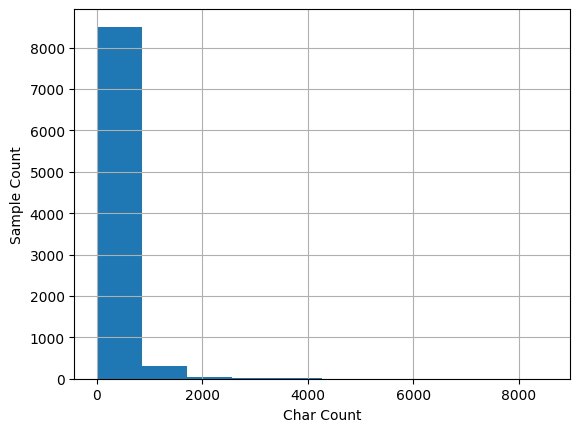

In [7]:
plt.xlabel('Char Count')
plt.ylabel('Sample Count')
combined_sentiment_df['text'].str.len().hist()

Text(0.5, 0, 'Char Count')

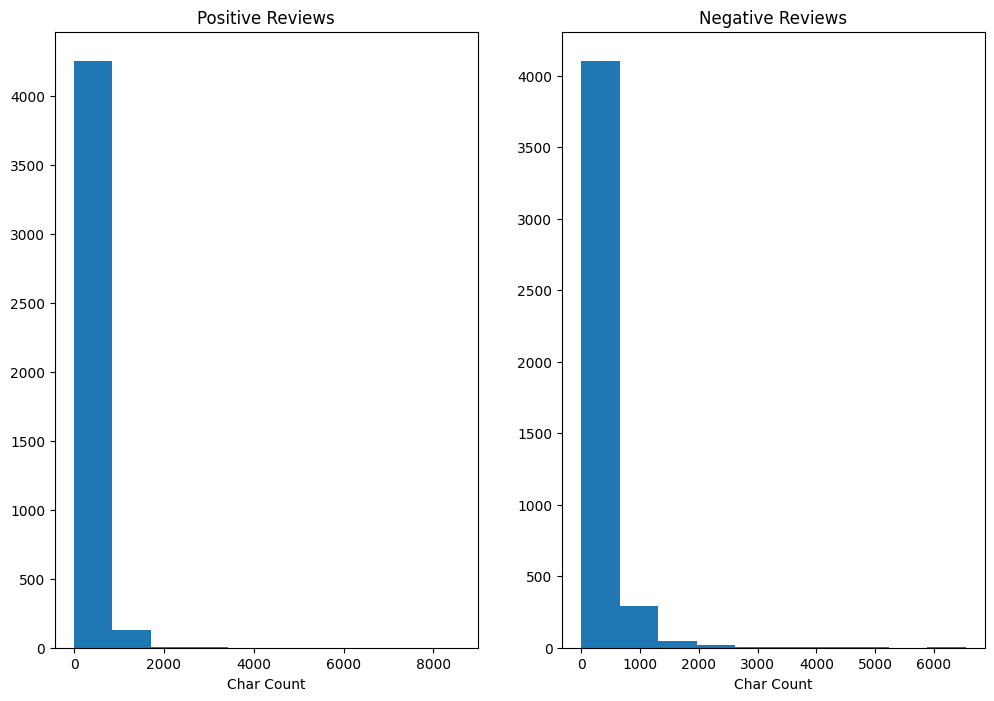

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(combined_sentiment_df[combined_sentiment_df['sentiment_label']==1]['text'].str.len())
ax1.set_title( 'Positive Reviews')
ax1.set_xlabel('Char Count')
ax2.hist(combined_sentiment_df[combined_sentiment_df['sentiment_label']==0]['text'].str.len())
ax2.set_title( 'Negative Reviews')
ax2.set_xlabel('Char Count')

#### Most common words

In [ ]:
# POSITIVE SENTIMENT
text = " ".join(i for i in combined_sentiment_df[combined_sentiment_df['sentiment_label']==1]['text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()


In [ ]:
# NEGATIVE SENTIMENT
text = " ".join(i for i in combined_sentiment_df[combined_sentiment_df['sentiment_label']==0]['text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()


## Preprocessing

### Dataset transformation

#### Training dataset

In [ ]:
## Text processing
combined_sentiment_df['clean_text']= combined_sentiment_df['text'].apply(lambda x: text_preprocess(x, remove_stopwords=True, remove_digits=True, stemmer=Stemmer.WordNet))
combined_sentiment_df

In [ ]:
#tokenization
combined_sentiment_df['tokenized_text'] = combined_sentiment_df['clean_text'].apply(lambda x: word_tokenize(x))
combined_sentiment_df

In [ ]:
combined_sentiment_df.to_csv('data_sentiment_preprocessed.csv', index=False)

#### validation dataset

In [ ]:
## Text processing
combined_sentiment_df_val['clean_text']= combined_sentiment_df_val['text'].apply(lambda x: text_preprocess(x, remove_stopwords=True, remove_digits=True, stemmer=Stemmer.WordNet))
combined_sentiment_df_val

In [ ]:
#tokenization
combined_sentiment_df_val['tokenized_text'] = combined_sentiment_df_val['clean_text'].apply(lambda x: word_tokenize(x))
combined_sentiment_df_val

In [ ]:
combined_sentiment_df_val.to_csv('data_sentiment_preprocessed_val.csv', index=False)

## Feature extraction

In [57]:
combined_sentiment_df = pd.read_csv("data_sentiment_preprocessed.csv")
combined_sentiment_df_val = pd.read_csv("data_sentiment_preprocessed_val.csv")

from our_feature_extraction import basic_bag, tf_idf
# Split the data
X_train = combined_sentiment_df.tokenized_text
y_train = combined_sentiment_df.sentiment_label
X_val = combined_sentiment_df_val.tokenized_text
y_val = combined_sentiment_df_val.sentiment_label


### Count BoW 

In [58]:
word_counts, vocab, selected_words, vectorizer, X_train_vec, X_val_vec = basic_bag(X_train, X_val, min_refs=3, debug=True)

Shape (X_train_vec) before reduction:  (8866, 13942)
Shape (X_train_vec) after reuction:  (8866, 6231)
Shape (X_val_vec):  (1212, 6231)


In [59]:
# 10 most common words
word_counts = np.asarray(X_train_vec.sum(axis=0)).flatten()
vocab = np.array(vectorizer.get_feature_names_out())

top_indices = np.argsort(word_counts)[::-1]
top_words = vocab[top_indices[:10]]
top_counts = word_counts[top_indices[:10]]

print('Most common words:')
for word, count in zip(top_words, top_counts):
    print(f"{word}: {count}")

Most common words:
not: 4523
good: 3415
food: 2608
get: 1843
go: 1610
place: 1569
like: 1549
would: 1527
time: 1374
one: 1363


In [60]:
np.unique(X_train_vec[2].toarray())

array([0, 1, 2])

### 1-hot vectors BoW

In [61]:
word_counts, vocab, selected_words, vectorizer, X_train_hot, X_val_hot = basic_bag(X_train, X_val, ohe=True)
print('Shape (X_train_hot): ', X_train_hot.shape)
# Transforming X_val data
print('Shape (X_val_hot): ', X_val_hot.shape)

Shape (X_train_hot):  (8866, 13942)
Shape (X_val_hot):  (1212, 13942)


In [62]:
# Checking if dataset is binary
unique = np.unique(X_train_hot.toarray())
print('Unique values:', unique)

Unique values: [0 1]


### TF-IDF

In [63]:
word_counts, vocab, selected_words, vectorizer, X_train_vec_tf, X_val_vec_tf = tf_idf(X_train, X_val, debug=True)

Shape (X_train_vec) before reduction:  (8866, 13942)
Shape (X_val_vec):  (1212, 13942)


In [64]:
word_counts

array([0.13627029, 0.30674865, 0.54615593, ..., 0.18706859, 0.0743741 ,
       0.26505371])

### N-grams

#### Bigrams

In [65]:
word_counts, vocab, selected_words, vectorizer, X_train_vec_bi, X_val_vec_bi = basic_bag(X_train, X_val, ngram_range=(2,2), min_refs=3, debug=True)

Shape (X_train_vec) before reduction:  (8866, 161809)
Shape (X_train_vec) after reuction:  (8866, 9566)
Shape (X_val_vec):  (1212, 9566)


In [66]:
bigram_vocab = vectorizer.get_feature_names_out()
bigram_counts = np.asarray(X_train_vec_bi.sum(axis=0)).flatten()

bigram_freq = list(zip(bigram_vocab, bigram_counts))

# Soritng
sorted_bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

print("10 most common bigrams:")
for bigram, count in sorted_bigram_freq[:10]:
    print(f"{bigram}: {count}")

10 most common bigrams:
ability work: 0
able eat: 0
able find: 0
able get: 0
able order: 0
absence also: 0
absence clean: 0
absence could: 0
absence fine: 0
absence food: 0


### Embeddings

In [67]:
import gensim.downloader as api

api.info() # List models or just go to the git as it is easier to read there: https://github.com/piskvorky/gensim-data?tab=readme-ov-file
model = api.load("glove-twitter-25") 
model.most_similar("n't")

[('think', 0.9858008027076721),
 ('know', 0.9772163033485413),
 ('but', 0.9746254682540894),
 ('either', 0.9740143418312073),
 ('if', 0.9736496806144714),
 ('they', 0.9727024435997009),
 ('that', 0.9722444415092468),
 ('when', 0.9720438122749329),
 ('would', 0.9706029891967773),
 ('really', 0.9704276323318481)]

In [68]:
model.most_similar('penis')

# Need to check, but I think if we use pretrained embeddings we need to match the preprocessing step to how the embeddings was done

[('vagina', 0.8970811367034912),
 ('finger', 0.8911336064338684),
 ('tongue', 0.8618690371513367),
 ('eye', 0.8475320935249329),
 ('anus', 0.8450093865394592),
 ('eyeliner', 0.8437599539756775),
 ('teeth', 0.8422453999519348),
 ('tampon', 0.8392389416694641),
 ('nipples', 0.8369837999343872),
 ('arm', 0.8346453905105591)]

## Modeling

### Naive Bayes

#### basic bag of words

In [ ]:
nb(X_train_vec, X_val_vec, y_train, y_val)

Accuracy: 0.8086

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       611
           1       0.79      0.84      0.81       601

    accuracy                           0.81      1212
   macro avg       0.81      0.81      0.81      1212
weighted avg       0.81      0.81      0.81      1212


Confusion Matrix:
[[473 138]
 [ 94 507]]


#### 1 hot vector bag of words

In [24]:
nb(X_train_hot, X_val_hot, y_train, y_val)

Accuracy: 0.8086

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       611
           1       0.78      0.85      0.81       601

    accuracy                           0.81      1212
   macro avg       0.81      0.81      0.81      1212
weighted avg       0.81      0.81      0.81      1212


Confusion Matrix:
[[471 140]
 [ 92 509]]


#### TF-IDF

In [25]:
nb(X_train_vec_tf, X_val_vec_tf, y_train, y_val)

Accuracy: 0.8061

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       611
           1       0.78      0.86      0.81       601

    accuracy                           0.81      1212
   macro avg       0.81      0.81      0.81      1212
weighted avg       0.81      0.81      0.81      1212


Confusion Matrix:
[[462 149]
 [ 86 515]]


#### Ngrams (Bi gram)

In [36]:
nb(X_train_vec_bi, X_val_vec_bi, y_train, y_val)


Accuracy: 0.5041

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       611
           1       0.00      0.00      0.00       601

    accuracy                           0.50      1212
   macro avg       0.25      0.50      0.34      1212
weighted avg       0.25      0.50      0.34      1212


Confusion Matrix:
[[611   0]
 [601   0]]


/Users/santiagoromero/Documents/nlp/nlp-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/santiagoromero/Documents/nlp/nlp-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/santiagoromero/Documents/nlp/nlp-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Support Vector Machine

#### basic bag of words

In [69]:
support_vector_machine(X_train_vec, X_val_vec, y_train, y_val)

Accuracy: 0.8160

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       611
           1       0.80      0.83      0.82       601

    accuracy                           0.82      1212
   macro avg       0.82      0.82      0.82      1212
weighted avg       0.82      0.82      0.82      1212


Confusion Matrix:
[[489 122]
 [101 500]]


#### 1 hot vector bag of words

In [70]:
support_vector_machine(X_train_hot, X_val_hot, y_train, y_val)

Accuracy: 0.8193

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       611
           1       0.81      0.83      0.82       601

    accuracy                           0.82      1212
   macro avg       0.82      0.82      0.82      1212
weighted avg       0.82      0.82      0.82      1212


Confusion Matrix:
[[494 117]
 [102 499]]


#### TF-IDF

In [71]:
support_vector_machine(X_train_vec_tf, X_val_vec_tf, y_train, y_val)

Accuracy: 0.8597

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       611
           1       0.88      0.84      0.86       601

    accuracy                           0.86      1212
   macro avg       0.86      0.86      0.86      1212
weighted avg       0.86      0.86      0.86      1212


Confusion Matrix:
[[540  71]
 [ 99 502]]


#### Ngrams (Bi gram)

In [72]:
support_vector_machine(X_train_vec_bi, X_val_vec_bi, y_train, y_val)


Accuracy: 0.5041

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       611
           1       0.00      0.00      0.00       601

    accuracy                           0.50      1212
   macro avg       0.25      0.50      0.34      1212
weighted avg       0.25      0.50      0.34      1212


Confusion Matrix:
[[611   0]
 [601   0]]


/Users/santiagoromero/Documents/nlp/nlp-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/santiagoromero/Documents/nlp/nlp-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/santiagoromero/Documents/nlp/nlp-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif